In [8]:
from pos import *

Media miedo inicial: 0.4928284362236343
-----------------------------------------------------------------------
Generacion 0


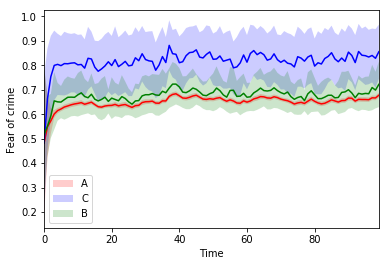

Media de crimen:0.667001787925485
Homofilia: 0.343001385864
Puntaje Generacion 0.6376269078302705
-----------------------------------------------------------------------
Generacion 1


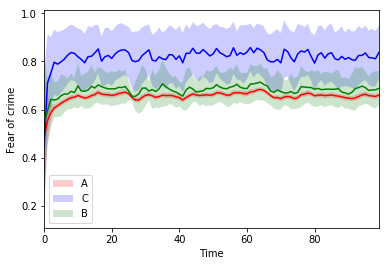

Media de crimen:0.6821879080301125
Homofilia: 0.335776684406
Puntaje Generacion 0.6470710291615
-----------------------------------------------------------------------
Generacion 2


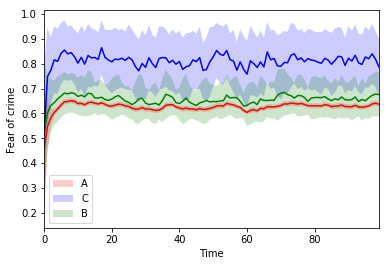

Media de crimen:0.6729882595254495
Homofilia: 0.35282905297
Puntaje Generacion 0.652856701221655
-----------------------------------------------------------------------
Generacion 3


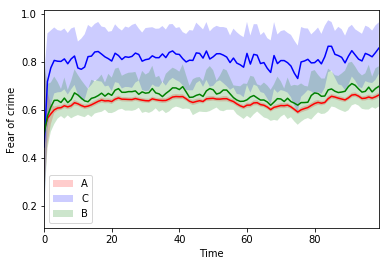

Media de crimen:0.6583393655378099
Homofilia: 0.349094976612
Puntaje Generacion 0.6587208971935347
-----------------------------------------------------------------------
Generacion 4


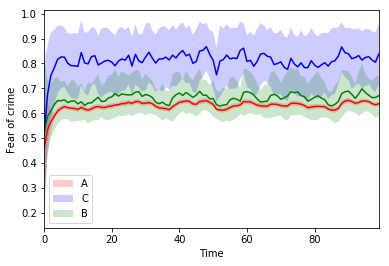

Media de crimen:0.6538461238755746
Homofilia: 0.35282905297
Puntaje Generacion 0.664154360879541
-----------------------------------------------------------------------
Generacion 5


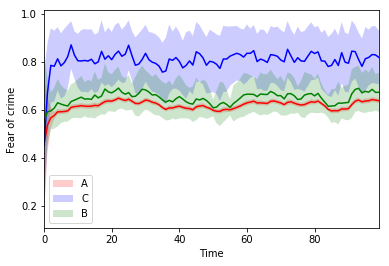

Media de crimen:0.6494576813851508
Homofilia: 0.356806571171
Puntaje Generacion 0.6680548995521688
-----------------------------------------------------------------------
Generacion 6


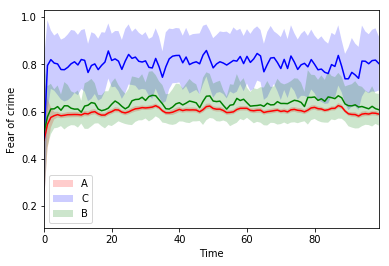

Media de crimen:0.6278899917604839
Homofilia: 0.364752870694
Puntaje Generacion 0.6728189386789373
-----------------------------------------------------------------------
Generacion 7


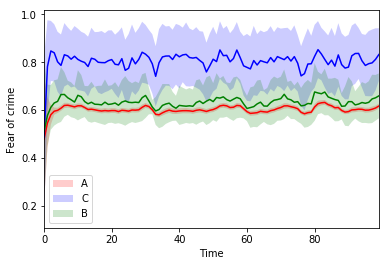

Media de crimen:0.6435615266627683
Homofilia: 0.364752870694
Puntaje Generacion 0.6767992472406833


In [ ]:
nodos=200
crimen=3
min_porcent=0.15
tipo_objetivo="h"

#Inicializacion de la poblacion
P=inicializacion(n_estados=150,crimen=crimen,min_porcent=min_porcent,size=nodos)
#Estado inicial miedo al crimen para cada nodo
s0=np.random.rand(nodos)

print("Media miedo inicial: "+ str(np.mean(s0)))

total_generaciones=15
#### for generaciones

for i in range(total_generaciones):
    
    print("-----------------------------------------------------------------------")
    print("Generacion "+ str(i))
    
    puntaje_generacion=[]

    
    for estado in P:
        puntaje_generacion.append(funcion_objetivo(estado,s0,tipo_objetivo))
        
    best_cromosome_generation=np.argsort(puntaje_generacion)[-1]
    
    
#     print("Mejor de la Generacion:")
#     print(P[best_cromosome_generation])
    
    media_crimen=plot(convert_matrix_to_vecinos(P[best_cromosome_generation]),s0)
    
    print("Media de crimen:" + str(media_crimen))
    
    homo=homofilia(convert_matrix_to_vecinos(P[best_cromosome_generation]))
    
    print("Homofilia: "+str(homo))
    
    print("Puntaje Generacion "+str(np.mean(puntaje_generacion)))


    #funcion densidad de probabilidad para muestrear estados de la poblacion actual que depende de su desempeño
    fdp=seleccion(Poblacion=P,s=s0,tipo=tipo_objetivo)

    #Hijos de la poblacion actual
    Nueva_Generacion=[]

    # Combinacion 
    while len(Nueva_Generacion) != len(P):
        padre1=sample(Poblacion=P,fdp=fdp)
        padre2=sample(Poblacion=P,fdp=fdp)
        hijos=combinacion(state1=padre1,state2=padre2)
        while (validar(state=hijos[0],crimen=crimen,min_porcent=min_porcent) and validar(state=hijos[1],crimen=crimen,min_porcent=min_porcent)) == False:
            hijos=combinacion(state1=padre1,state2=padre2)
        Nueva_Generacion+=hijos

    # Mutacion
    for i in range(len(Nueva_Generacion)):
        Nueva_Generacion[i]=mutacion(Nueva_Generacion[i],crimen)

    # Reemplazo

    total = P+Nueva_Generacion

    fo=[]
    for t in total:
        fo.append(funcion_objetivo(t,s0,tipo_objetivo))
    order=np.argsort(fo)[::-1]
    best=order[:len(P)]
    for i in range(len(P)):
        P[i]=total[best[i]]
print("////////////////////////////////////////////////////////////////")
puntaje_generacion=[]
for estado in P:
    puntaje_generacion.append(funcion_objetivo(estado,s0,tipo_objetivo))
best_cromosome_generation=np.argsort(puntaje_generacion)[-1]
# print("Mejor Solucion:")
# print(P[best_cromosome_generation])

media_crimen=plot(convert_matrix_to_vecinos(P[best_cromosome_generation]),s0)

print("Media de crimen:" + str(media_crimen))

homo=homofilia(convert_matrix_to_vecinos(P[best_cromosome_generation]))

print("Homofilia: "+str(homo))